In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb, slic, quickshift, mark_boundaries
from skimage.morphology import watershed
from skimage.future.graph import cut_normalized
from sklearn.cluster import MeanShift
from skimage.color import rgb2grey
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from PIL.Image import open
%matplotlib inline

In [ ]:
# Put image in here
col_im = np.asarray(open("Flowers.tiff"))[:,:,0:3]
grey_im = rgb2grey(col_im)
plt.imshow(col_im)

In this example, the following 6 different superpixel methods are compared:

- **Watershed** (Vincent and Soille, 1991)
- **Normalised Cuts** (Shi and Malik, 2000)
- **Mean Shift** (Comaniciu and Meer, 2002)
- **Felzenszwalb's efficient graph based image segmentation** (Felzenszwalb et al, 2004)
- **Quick Shift** (Vedaldi and Soatto, 2008)
- **SLIC Superpixels** (Achanta et al, 2012)

# Superpixel methods compared

In [ ]:
# do something interative here

# Individual Method Parameterisation

## Watershed

In [ ]:
# watershed interative with slider

## Normalised Cuts

In [ ]:
# normalised cuts interative

## Mean Shift

In [ ]:
# mean shift here

## Felzenszwalb Method

### Variables

* Scale: Higher scale means less and larger segments
* Sigma: diameter of kernel used for Gaussian smoothing
* Min_size: Minimum component size

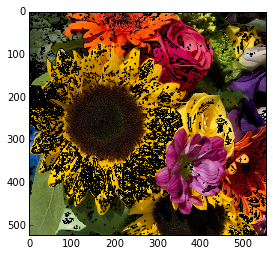

In [44]:
@interact(im=fixed(col_im),
          scale=widgets.FloatSlider(min=0.5, max=3, step=0.1, value=2),
          sigma=widgets.FloatSlider(min=0., max=2, step=0.1, value=0.5),
          min_size=widgets.IntSlider(min=3, max=20, step=1, value=3))
def felz(im, scale, sigma, min_size):
    labels = felzenszwalb(im, scale, sigma, min_size)
    marked = mark_boundaries(im, labels, color=(0,0,0))
    plt.imshow(marked)
    return labels

## Quick Shift

### Variables

* Ratio: Balances color-space and image-space proximity. Higher values give more weight to color-space.
* kernel_size: diameter of kernel. Higher means fewer clusters.
* max_dist: Cut-off point for data distances. Higher means fewer clusters.

No smoothing

In [ ]:
@interact(im=fixed(col_im),
          ratio=widgets.FloatSlider(min=0, max=1, step=0.1, value=1),
          max_dist=widgets.IntSlider(min=1, max=20, step=1, value=10))
def quick(im, ratio, max_dist):
    labels = quickshift(im, ratio, max_dist)
    marked = mark_boundaries(im, labels, color=(0,0,0))
    plt.imshow(marked)

## SLIC Superpixels

### Variables

* n_segments: Number of segments (on average) to split the image into
* Compactness: Higher values make segments more square

In [ ]:
@interact(im=fixed(grey_im),
          n_segments=widgets.IntSlider(min=8, max=256, step=8, value=32),
          compactness=widgets.FloatSlider(min=0.01, max=100, step=0.01, value=10.0))
def SLIC(im,n_segments, compactness):
    labels = slic(im, n_segments, compactness)
    marked = mark_boundaries(im, labels)
    plt.imshow(marked)